## Time Resampling

In [ ]:
import pandas as pd

In [ ]:
pd.date_range(start='07-01-2025', end = '7-30-2025', freq='W')

DatetimeIndex(['2025-07-06', '2025-07-13', '2025-07-20', '2025-07-27'], dtype='datetime64[ns]', freq='W-SUN')

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [ ]:
df = pd.read_csv('/content/SBUX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400
1,1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800
2,1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600
3,1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800
4,1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800


In [ ]:
df = df.drop(columns = ['Open', 'High', 'Low', 'Adj Close'])

In [ ]:
df.head()

,Date,Close,Volume
0,1992-06-26,0.335938,224358400
1,1992-06-29,0.359375,58732800
2,1992-06-30,0.347656,34777600
3,1992-07-01,0.355469,18316800
4,1992-07-02,0.355469,13996800


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7919 entries, 0 to 7918
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7919 non-null   object 
 1   Close   7919 non-null   float64
 2   Volume  7919 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 185.7+ KB


In [ ]:
df.index = pd.to_datetime(df['Date'])

In [ ]:
df.drop("Date", axis=1, inplace=True)

In [ ]:
df.shape

(7919, 2)

In [ ]:
data = pd.read_csv('/content/SBUX.csv', parse_dates=True, index_col = 'Date')
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1992-06-26,0.328125,0.347656,0.320313,0.335938,0.264262,224358400
1992-06-29,0.339844,0.367188,0.332031,0.359375,0.282698,58732800
1992-06-30,0.367188,0.371094,0.343750,0.347656,0.273479,34777600
1992-07-01,0.351563,0.359375,0.339844,0.355469,0.279625,18316800
1992-07-02,0.359375,0.359375,0.347656,0.355469,0.279625,13996800


In [ ]:
df.iloc[0]

,1992-06-26
Close,3.359380e-01
Volume,2.243584e+08


In [ ]:
df.loc['2023-12-05']

,2023-12-05
Close,9.554000e+01
Volume,1.601990e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7919 entries, 1992-06-26 to 2023-12-05
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   7919 non-null   float64
 1   Volume  7919 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 443.6 KB


In [ ]:
full_date_range = pd.date_range(start=df.index.min(), end= df.index.max(), freq='B')
print("Full date range with business days:")
print(full_date_range)

Full date range with business days:
DatetimeIndex(['1992-06-26', '1992-06-29', '1992-06-30', '1992-07-01',
               '1992-07-02', '1992-07-03', '1992-07-06', '1992-07-07',
               '1992-07-08', '1992-07-09',
               ...
               '2023-11-22', '2023-11-23', '2023-11-24', '2023-11-27',
               '2023-11-28', '2023-11-29', '2023-11-30', '2023-12-01',
               '2023-12-04', '2023-12-05'],
              dtype='datetime64[ns]', length=8203, freq='B')


In [ ]:
df.index.min()

Timestamp('1992-06-26 00:00:00')

In [ ]:
df.index.max()

Timestamp('2023-12-05 00:00:00')

In [ ]:
df.resample(rule='M').mean()

/tmp/ipython-input-2924902352.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule='M').mean()


,Close,Volume
Date,,
1992-06-30,0.347656,1.059563e+08
1992-07-31,0.399325,1.248844e+07
1992-08-31,0.399833,8.548571e+06
1992-09-30,0.467262,1.390324e+07
1992-10-31,0.470792,8.004073e+06
...,...,...
2023-08-31,98.962174,5.524391e+06
2023-09-30,94.782500,5.656120e+06
2023-10-31,92.762727,5.817618e+06


In [ ]:
print(df.index.is_monotonic_increasing)

True


In [ ]:
df.sort_index()

,Close,Volume
Date,,
1992-06-26,0.335938,224358400
1992-06-29,0.359375,58732800
1992-06-30,0.347656,34777600
1992-07-01,0.355469,18316800
1992-07-02,0.355469,13996800
...,...,...
2023-11-29,99.849998,8428500
2023-11-30,99.300003,11442600
2023-12-01,99.199997,12503900


<Axes: xlabel='Date'>

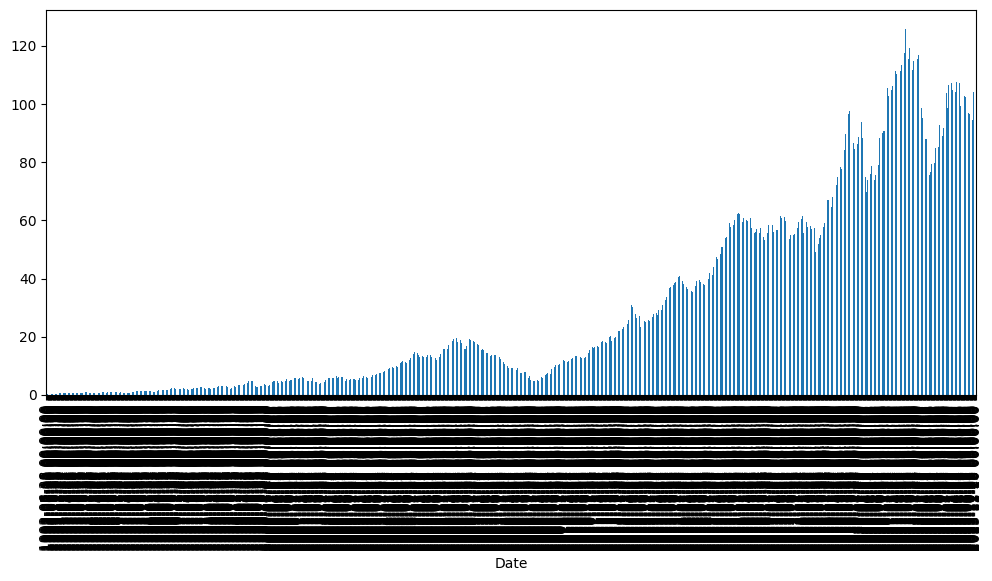

In [ ]:
df['Close'].resample(rule="W").max().plot(kind='bar', figsize=(12,5))

In [ ]:
df['Close'].resample(rule='W').mean()

,Close
Date,
1992-06-28,0.335938
1992-07-05,0.354492
1992-07-12,0.356250
1992-07-19,0.392578
1992-07-26,0.438281
...,...
2023-11-12,103.714001
2023-11-19,105.584000
2023-11-26,103.552502


/tmp/ipython-input-3502222594.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df['Close'].resample("Y").mean().plot(kind='bar', figsize=(12,5))


<Axes: xlabel='Date'>

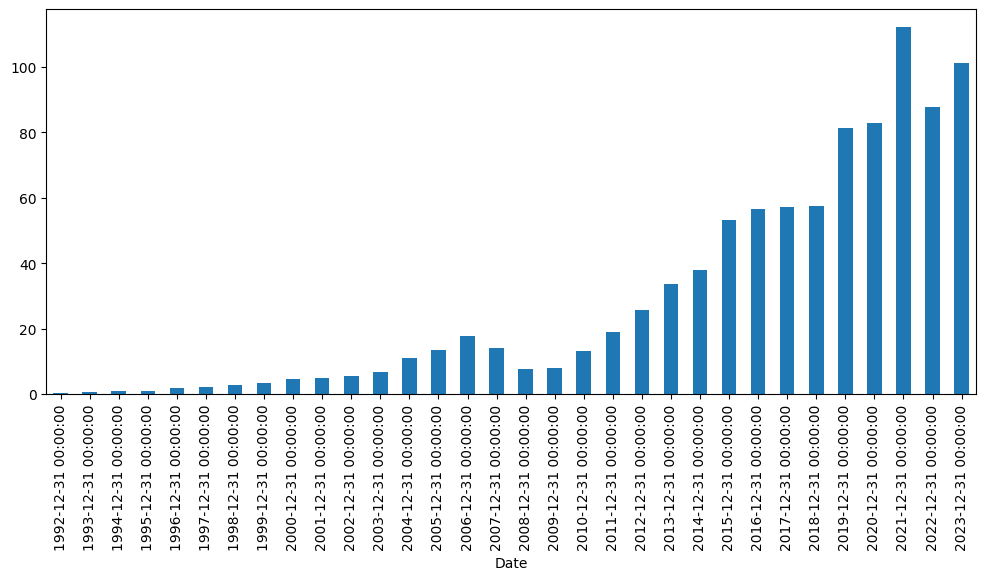

In [ ]:
df['Close'].resample("Y").mean().plot(kind='bar', figsize=(12,5))

/tmp/ipython-input-2153075489.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Close'].resample("M").mean().plot(kind='bar', figsize=(12,5))


<Axes: xlabel='Date'>

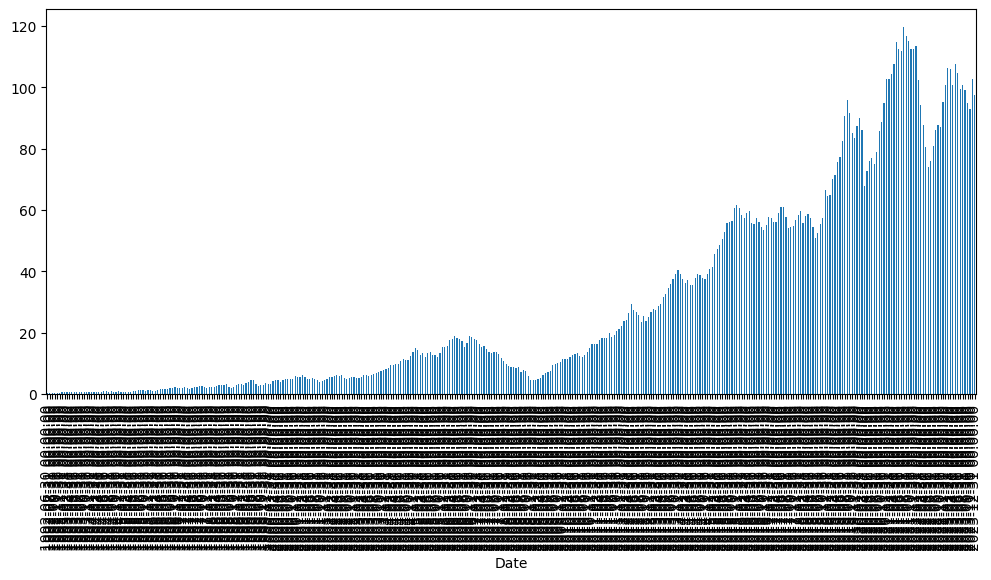

In [ ]:
df['Close'].resample("M").mean().plot(kind='bar', figsize=(12,5))